# Electricity Generators data set from SL79-80
# Corrected OLS for deterministic frontier model

In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as mp

from sklearn         import linear_model
from sklearn.metrics import r2_score
from scipy           import stats

### 1. Import data

In [2]:
SOURCE = "../DataSets/cowing.xlsx"
df = pd.read_excel(SOURCE)

In [3]:
for col in ["P1", "P2", "P3"]:
    df[col] = np.log(df[col])

### 2. Estimation

In [4]:
model = linear_model.LinearRegression()
model.fit( df[["X1", "X2", "X3"]], df["y"] )
pred  = model.predict(df[["X1", "X2", "X3"]])

In [5]:
resid     = df["y"] - pred
u_star    = -(resid - resid.max())
eff_colsd = np.exp(-u_star)

### 3. Output

In [6]:
newX = pd.DataFrame({"Constant":np.ones(df.shape[0])}).join(df[["X1", "X2", "X3"]])
var_b = ( np.linalg.inv(np.dot(newX.T, newX)).diagonal() )

EDF  = newX.shape[0] - newX.shape[1]
MSE  = (sum((df["y"] - pred)**2)) / EDF
rootMSE = np.sqrt(MSE)

est   = np.append(model.intercept_, model.coef_)
SE    = rootMSE * np.sqrt(var_b)
tStat = est / SE
pVal  = 2 * (1 - stats.t.cdf(np.abs(tStat), EDF))

est   = np.round(est, 3)
SE    = np.round(SE, 5)
tStat = np.round(tStat, 3)

colsd = 
Linear regression model: 
     y ~ 1 + x1 + x2 + x3 

Number of observations: 111, Error degrees of freedom: 107
Root Mean Squared Error: 0.0835
R-squared: 0.993, Adjusted R-Squared: 234.000

Estimated Coefficients:


,Estimate,SE,tStat,pValue
(Intersept),-11.166,0.20473,-54.540,0.000000
X1,0.036,0.01713,2.095,0.038493
X2,1.096,0.01700,64.469,0.000000
X3,-0.021,0.02271,-0.923,0.358130


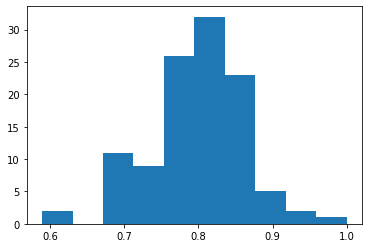

In [7]:
print("colsd = \nLinear regression model: \n \
    y ~ 1 + x1 + x2 + x3 \n")

output = pd.DataFrame(index  =["(Intersept)", "X1", "X2", "X3"], 
                      columns=["Estimate", "SE", "tStat", "pValue"])
output["Estimate"] = est
output["SE"]       = SE
output["tStat"]    = tStat
output["pValue"]   = pVal

print("Number of observations: %.d, Error degrees of freedom: %.d" % \
      (df.shape[0], EDF))
print("Root Mean Squared Error: %.4f" % rootMSE)
print("R-squared: %.3f, Adjusted R-Squared: %.3f" % \
      (r2_score(df["y"], pred), 234))
mp.hist(eff_colsd);

print("\nEstimated Coefficients:")
output